# Windy Gridworld

![title](windy_gridworld_pic.png)

# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# House Keeping

In [2]:
# Set a Seed
np.random.seed(802)

# Grid size
grid_rows = 7
grid_cols = 10

# Wind Strength 
wind = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Locations
start = [3, 0]
goal = [3, 7]

# Action set 0=Up 1=Down 2=Left 3=Right
actions = range(4)

# Reward at Each Step
reward = -1

# Step Size
alpha = 0.5

# Exploration Rate
epsilon = 0.1

# Set number of episodes to run
episodes = 250

# Q Tables

In [3]:
q_table_sarsa = np.zeros([grid_rows, grid_cols, len(actions)])
q_table_ql = np.zeros([grid_rows, grid_cols, len(actions)])

# Step Function

In [4]:
def step(state, action):
    
    rownum, colnum = state
    
    # 0=Up
    if action==0:
        rownum = max( rownum -1 -wind[colnum], 0 )
    
    # 1=Down
    elif action==1:
        rownum = max( min( rownum +1 -wind[colnum], grid_rows-1 ), 0 )
    
    # 2=Left
    elif action==2:
        rownum = max( rownum -wind[colnum], 0 )
        colnum = max( colnum -1, 0 )
    
    # 3=Right
    else:
        rownum = max( rownum -wind[colnum], 0 )
        colnum = min( colnum +1, grid_cols-1 )
        
    return [rownum, colnum]

# Greedy Action Function

In [5]:
def greedy(state, q_table, epsilon):
    
    # Randomly select action with probability epsilon
    if np.random.uniform() < epsilon:
        g_action = np.random.choice(actions)
        
    # Select the best action for the given state with probability 1-epsilon
    else:
        q_vals = q_table[state[0], state[1], :]
        q_vals_max = np.where(q_vals==q_vals.max())[0]
        g_action = np.random.choice(q_vals_max)
    
    return g_action

# SARSA

In [6]:
# Store the steps to reach the goal for each episode
steps_vec_sarsa = []

# SARSA
for i in range(episodes):
    
    # Count steps per episode
    steps_count = 0
    
    # Always start in the same position
    state = start
    
    # Choose action based on epsilon-greedy
    action = greedy(state, q_table_sarsa, epsilon)
    
    # Loop until the goal is reached
    while state!=goal:
        
        # Find next state given current state and action
        new_state = step(state, action)
        
        # Choose action based on epsilon-greedy
        new_action = greedy(new_state, q_table_sarsa, epsilon)
        
        # Update the q-table with SARSA
        q_table_sarsa[state[0],state[1],action] = q_table_sarsa[state[0],state[1],action] + \
            alpha * ( reward + q_table_sarsa[new_state[0],new_state[1],new_action] - \
                q_table_sarsa[state[0],state[1],action] )
        
        # Set new state to current state and new action to current action
        state = new_state
        action = new_action
        
        # Update steps count
        steps_count += 1
        
    steps_vec_sarsa.append(steps_count)

# Q-Learning

In [7]:
# Store the steps to reach the goal for each episode
steps_vec_ql = []

# Q-Learning
for i in range(episodes):
    
    # Count steps per episode
    steps_count = 0
    
    # Always start in the same position
    state = start
    
    # Loop until the goal is reached
    while state!=goal:
        
        # Choose action based on epsilon-greedy
        action = greedy(state, q_table_ql, epsilon)
        
        # Find next state given current state and action
        new_state = step(state, action)
        
        # Update the q-table with Q-Learning
        q_table_ql[state[0],state[1],action] = q_table_ql[state[0],state[1],action] + \
            alpha * ( reward + max(q_table_ql[new_state[0],new_state[1],]) - \
            q_table_ql[state[0],state[1],action] )

        # Set new state to current state
        state = new_state
        
        # Update steps count
        steps_count += 1
        
    steps_vec_ql.append(steps_count)

# View SARSA and Q-Learning Results

In [8]:
min_steps_sarsa = min(steps_vec_sarsa)
optimal_path_count_sarsa = sum(np.array(steps_vec_sarsa)==min_steps_sarsa)
print("The agent followed the optimal path", 100*optimal_path_count_sarsa/episodes, "% of the time with SARSA.")

min_steps_ql = min(steps_vec_ql)
optimal_path_count_ql = sum(np.array(steps_vec_ql)==min_steps_ql)
print("The agent followed the optimal path", 100*optimal_path_count_ql/episodes, "% of the time with Q-Learning.")

The agent followed the optimal path 0.4 % of the time with SARSA.
The agent followed the optimal path 14.4 % of the time with Q-Learning.


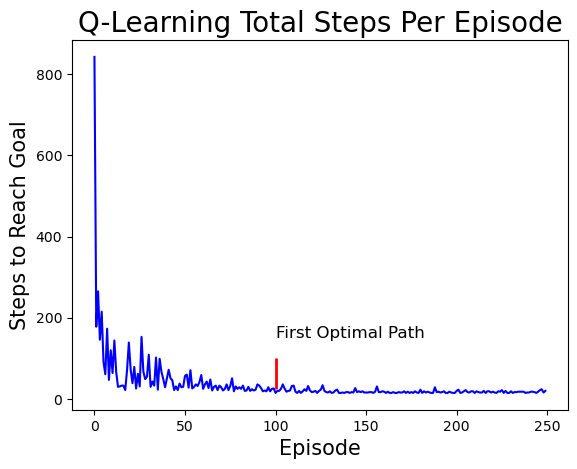

In [9]:
plt.plot(steps_vec_ql, color="blue")
plt.title("Q-Learning Total Steps Per Episode", fontsize=20)
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Steps to Reach Goal", fontsize=15)
plt.text(steps_vec_ql.index(min_steps_ql),150,"First Optimal Path", fontsize=12)
plt.vlines(x=steps_vec_ql.index(min_steps_ql), ymin=25, ymax=100, color='red', lw=2)
plt.show()

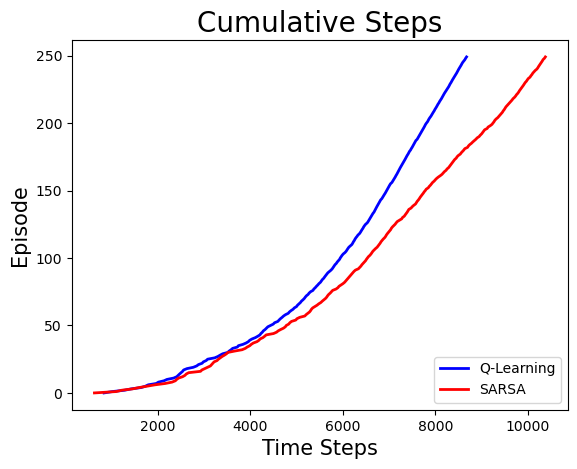

In [10]:
plt.plot(np.cumsum(steps_vec_ql), range(episodes), color="blue", lw=2, label="Q-Learning")
plt.plot(np.cumsum(steps_vec_sarsa), range(episodes), color="red", lw=2, label="SARSA")
plt.title("Cumulative Steps", fontsize=20)
plt.xlabel("Time Steps", fontsize=15)
plt.ylabel("Episode", fontsize=15)
plt.legend(loc="lower right")
plt.show()

# Optimal Path

In [11]:
optimal_policy_ql = np.zeros([grid_rows,grid_cols], dtype=str)

for i in range(grid_rows):
    for j in range(grid_cols):
        direction = np.argmax(q_table_ql[i,j,:])
        if direction==0:
            optimal_policy_ql[i,j]="U"
        elif direction==1:
            optimal_policy_ql[i,j]="D"
        elif direction==2:
            optimal_policy_ql[i,j]="L"
        else:
            optimal_policy_ql[i,j]="R"

optimal_policy_ql[goal[0],goal[1]] = "G"
np.vstack([optimal_policy_ql, wind])

array([['L', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['U', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D'],
       ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'D', 'D'],
       ['L', 'D', 'R', 'D', 'R', 'U', 'U', 'D', 'L', 'L'],
       ['L', 'L', 'R', 'U', 'L', 'U', 'U', 'U', 'U', 'D'],
       ['U', 'R', 'R', 'D', 'U', 'U', 'U', 'U', 'L', 'L'],
       ['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']], dtype='<U11')